In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [6]:
uploaded = files.upload()

Saving card_transdata.csv to card_transdata (1).csv


In [8]:
data = pd.read_csv("card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [8]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
data.shape

(1000000, 8)

In [17]:
missing_values = data.isnull().sum()
missing_values

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [25]:
#si y a des valeurs manquante
data.dropna(axis= 0 , how ="any" , inplace = True )

In [23]:
duplicates_rows = data[data.duplicated()]
print("dulicated rows :")
print(duplicates_rows)

dulicated rows :
Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


In [26]:
data.drop_duplicates(inplace= True)

In [27]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Evaluating the security of chip & pin transaction**

In [5]:
DF = data[["used_chip","used_pin_number","fraud"]]
DF

,used_chip,used_pin_number,fraud
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
999995,1.0,0.0,0.0
999996,1.0,0.0,0.0
999997,1.0,0.0,0.0
999998,0.0,0.0,0.0


In [6]:
total_transactions = len(DF)
total_fraud = DF["fraud"].sum()
fraud_by_chip = DF.groupby("used_chip")["fraud"].sum()
fraud_by_pin = DF.groupby("used_pin_number")["fraud"].sum()
print("Total Transactions :",total_transactions)
print("Total Fraud :",total_fraud)
print("Fraud cases using Chip",fraud_by_chip[1.0],"out of ",total_transactions)
print("Fraud cases using Pin",fraud_by_pin[1.0],"out of ",total_transactions)

Total Transactions : 1000000
Total Fraud : 87403.0
Fraud cases using Chip 22410.0 out of  1000000
Fraud cases using Pin 273.0 out of  1000000


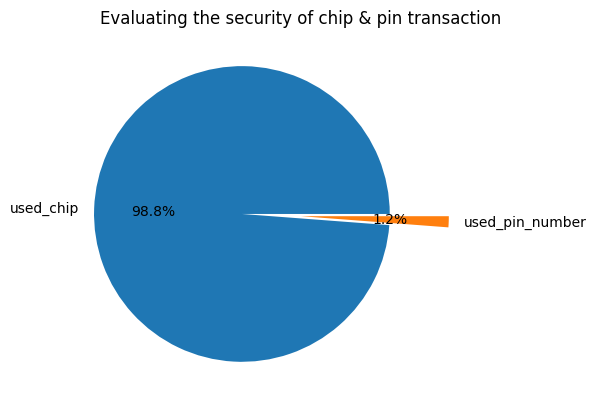

In [7]:
plt.pie([fraud_by_chip[1.0],fraud_by_pin[1.0]],labels=["used_chip","used_pin_number"],explode=[0.4,0],autopct="%1.1f%%");
plt.title("Evaluating the security of chip & pin transaction");

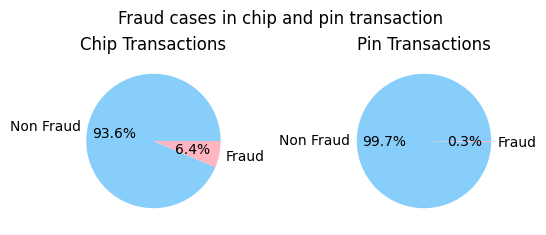

In [8]:
total_transactions_chip = DF["used_chip"].sum()
total_transactions_pin = DF["used_pin_number"].sum()
plt.subplot(2,2,1)
plt.title("Chip Transactions")
plt.pie([total_transactions_chip-fraud_by_chip[1.0] , fraud_by_chip[1.0] ],labels=["Non Fraud","Fraud"],autopct="%1.1f%%",colors=["lightskyblue","lightpink"]);
plt.subplot(2,2,2);
plt.title("Pin Transactions")
plt.pie([total_transactions_pin-fraud_by_pin[1.0] , fraud_by_pin[1.0] ],labels=["Non Fraud","Fraud"],autopct="%1.1f%%",colors=["lightskyblue","lightpink"]);
plt.suptitle("Fraud cases in chip and pin transaction");

In [9]:
DF_Retailer = data[["repeat_retailer","fraud"]]
DF_Retailer

,repeat_retailer,fraud
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
999995,1.0,0.0
999996,1.0,0.0
999997,1.0,0.0
999998,1.0,0.0


In [10]:
fraud_seq = []
pre_fraud_seq = []
for index , row in DF_Retailer.iterrows():
  repeat_retailer , fraud = row["repeat_retailer"] , row["fraud"]
  if fraud == 1:
    if   pre_fraud_seq  :
      fraud_seq.append(pre_fraud_seq.copy())
    pre_fraud_seq = []
  else :
      pre_fraud_seq.append('Repeat Retailer' if repeat_retailer==1.0 else 'No Repeat Retailer')
for i , seq  in enumerate(fraud_seq[:10],start = 1 ) :
  print("seq ",i,",".join(seq))

seq  1 Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,No Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
seq  2 Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,No Repeat Retailer,Repeat Retailer
seq  3 Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
seq  4 Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
seq  5 Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,No Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
seq  6 Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
seq  7 Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,No Repeat Retailer,Repeat Retailer,No Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat R

In [26]:
import seaborn as sns
corr = data["ratio_to_median_purchase_price"].corr(data["fraud"])
print("Correlation :",round(corr,2))
print("plus le montant d'une transaction est elevé plus \nla probabilité de fraude augmente")

Correlation : 0.46
plus le montant d'une transaction est elevé plus 
la probabilité de fraude augmente


In [32]:
#calculat average transaction amount fraud/non fraud
avgNonFradTrans = data["ratio_to_median_purchase_price"].groupby(data["fraud"]).mean()[0]
avgFradTrans = data["ratio_to_median_purchase_price"].groupby(data["fraud"]).mean()[1]
print("Average Transaction Amount Fraud :",round(avgFradTrans,2))
print("Average Transaction Amount Non Fraud :",round(avgNonFradTrans,2))

Average Transaction Amount Fraud : 6.01
Average Transaction Amount Non Fraud : 1.42


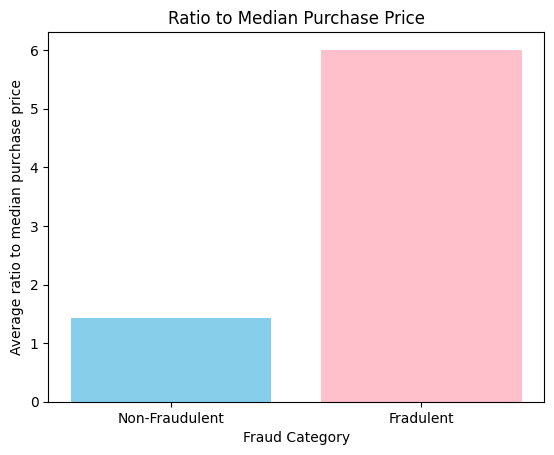

In [42]:
colors = ["skyblue","pink"]
plt.bar(["Non-Fraudulent","Fradulent"],[avgNonFradTrans,avgFradTrans],color=colors);
plt.xlabel("Fraud Category");
plt.ylabel("Average ratio to median purchase price");
plt.title("Ratio to Median Purchase Price");

In [11]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [90]:
DF3 = data[["online_order","fraud"]]
total_online_orders = DF3["online_order"].sum()
total_online_fraud = DF3[(DF3["fraud"]==1 ) & (DF3["online_order"]==1) ]["fraud"].count()
total_rate_online = total_online_fraud / total_online_orders
total_offline_orders = len(DF3) - total_online_orders
total_offline_fraud = DF3[(DF3["online_order"]==0)&(DF3["fraud"]==1)]["fraud"].count()
total_rate_offline = total_offline_fraud / total_offline_orders
print("Fraud rate online transactions :",round(total_rate_online,3)*100,"% (",total_online_fraud ,"cases out of ",total_online_orders,"online transactions )")
print("Fraud rate offline transactions :",round(total_rate_offline,3)*100,"% (",total_offline_fraud ,"cases out of ",total_offline_orders,"online transactions )")

Fraud rate online transactions : 12.7 % ( 82711 cases out of  650552.0 online transactions )
Fraud rate offline transactions : 1.3 % ( 4692 cases out of  349448.0 online transactions )


RANDOM FOREST :

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
x = data.iloc[:,:-1]
y = data["fraud"]

NameError: name 'data' is not defined

In [96]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)
model1 = RandomForestClassifier(random_state=42)
model1.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
feature_importance = pd.Series(model1.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importance)

ratio_to_median_purchase_price    0.527173
online_order                      0.169382
distance_from_home                0.134905
used_pin_number                   0.063926
used_chip                         0.052102
distance_from_last_transaction    0.045709
repeat_retailer                   0.006803
dtype: float64


In [109]:
new_x = data.iloc[:,:-1].sample(1,random_state=99)
print(new_x)

        distance_from_home  distance_from_last_transaction  \
852342            0.657097                        2.028615   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
852342                        4.541033              0.0        0.0   

        used_pin_number  online_order  
852342              0.0           1.0  


In [110]:
pred1 = model1.predict(new_x)
print("Fraud" if pred1[0]==1 else "Legitimate")

Fraud


Logistic Regression :

In [112]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

X = data.drop(columns=["fraud"])
y = data["fraud"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)


model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train_scaled, y_train)

y_pred  = model2.predict(X_test_scaled)
y_proba = model2.predict_proba(X_test_scaled)[:, 1]

print("\nMetrics (test) :")
print(f"Précision : {precision_score(y_test, y_pred):.4f}")
print(f"Rappel    : {recall_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_proba):.4f}")


new_x2 = X_test.sample(1, random_state=42)
new_x2_scaled = sc.transform(new_x2)
pred2 = model2.predict(new_x2_scaled)[0]
proba2 = model2.predict_proba(new_x2_scaled)[0, 1]

print("\nNouvelle transaction :")
print(new_x2)
print("Prédiction :", "Fraud" if pred2 == 1 else "Legitimate", f"(P(fraud) = {proba2:.2%})")



Metrics (test) :
Précision : 0.8964
Rappel    : 0.6056
F1-score  : 0.7228
Accuracy  : 0.9594
ROC AUC   : 0.9670

Nouvelle transaction :
        distance_from_home  distance_from_last_transaction  \
109977            0.425739                        0.122159   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
109977                        2.662015              0.0        0.0   

        used_pin_number  online_order  
109977              0.0           0.0  
Prédiction : Legitimate (P(fraud) = 0.03%)
